In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid", palette="muted")


df = pd.read_csv("Warehouse_and_Retail_Sales.csv")


df.head()


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [2]:
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())


Shape: (307645, 9)
Missing values:
 YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64


In [3]:
df.dropna(inplace=True)

# Confirm result
print("After cleaning, shape:", df.shape)
print("Remaining missing values:\n", df.isnull().sum())

After cleaning, shape: (307477, 9)
Remaining missing values:
 YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307477 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307477 non-null  int64  
 1   MONTH             307477 non-null  int64  
 2   SUPPLIER          307477 non-null  object 
 3   ITEM CODE         307477 non-null  object 
 4   ITEM DESCRIPTION  307477 non-null  object 
 5   ITEM TYPE         307477 non-null  object 
 6   RETAIL SALES      307477 non-null  float64
 7   RETAIL TRANSFERS  307477 non-null  float64
 8   WAREHOUSE SALES   307477 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 23.5+ MB


In [5]:
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307477.000000,307477.000000,307477.000000,307477.000000,307477.000000
mean,2018.438238,6.424064,7.003644,6.938177,25.375561
std,1.083080,3.461853,30.387012,30.244239,249.500572
min,2017.000000,1.000000,-6.490000,-38.490000,-4996.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.260000,3.000000,5.000000
max,2020.000000,12.000000,1816.490000,1990.830000,18317.000000


In [6]:
print("Total unique suppliers:", df['SUPPLIER'].nunique())

print("\nTop 5 suppliers by number of transactions:")
print(df['SUPPLIER'].value_counts().head())

Total unique suppliers: 396

Top 5 suppliers by number of transactions:
SUPPLIER
REPUBLIC NATIONAL DISTRIBUTING CO       20994
LEGENDS LTD                             13634
SOUTHERN GLAZERS WINE AND SPIRITS       11720
E & J GALLO WINERY                      10816
THE COUNTRY VINTNER, LLC DBA WINEBOW    10669
Name: count, dtype: int64


In [7]:
print("Total unique item types:", df['ITEM TYPE'].nunique())

print("\nItem types by transaction count:")
print(df['ITEM TYPE'].value_counts())

Total unique item types: 8

Item types by transaction count:
ITEM TYPE
WINE            187640
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1899
STR_SUPPLIES       318
REF                 79
DUNNAGE             72
Name: count, dtype: int64


/var/folders/ph/rp_k0z0x7rzbmjtd7j2pdjjc0000gn/T/ipykernel_69414/283728536.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=type_sales, x="RETAIL SALES", y="ITEM TYPE", palette="Blues_r")


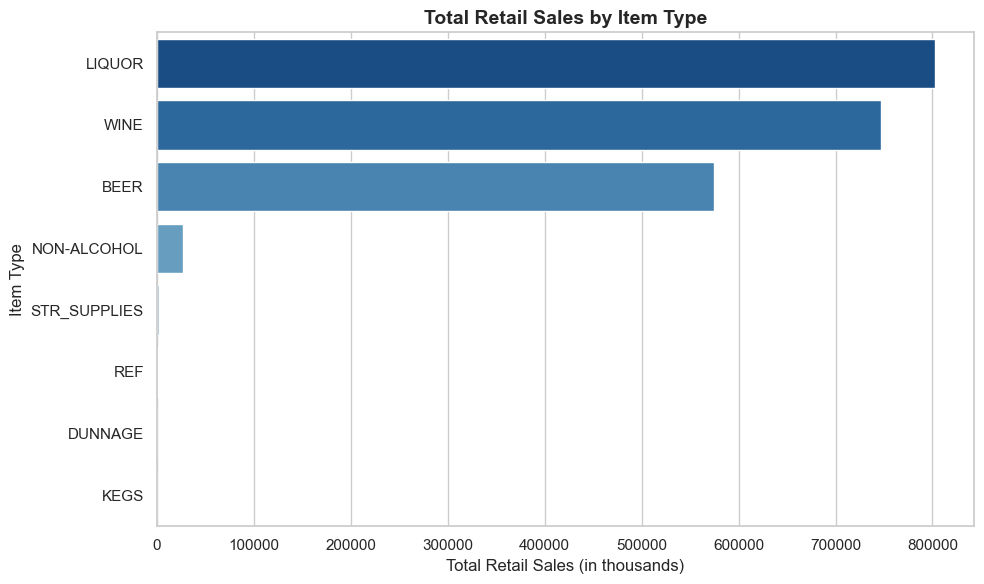

In [8]:
type_sales = (
    df.groupby("ITEM TYPE")["RETAIL SALES"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=type_sales, x="RETAIL SALES", y="ITEM TYPE", palette="Blues_r")

# Title and labels
plt.title("Total Retail Sales by Item Type", fontsize=14, weight='bold')
plt.xlabel("Total Retail Sales (in thousands)")
plt.ylabel("Item Type")
plt.tight_layout()
plt.show()

/var/folders/ph/rp_k0z0x7rzbmjtd7j2pdjjc0000gn/T/ipykernel_69414/1929358671.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_suppliers, x="RETAIL SALES", y="SUPPLIER", palette="crest")


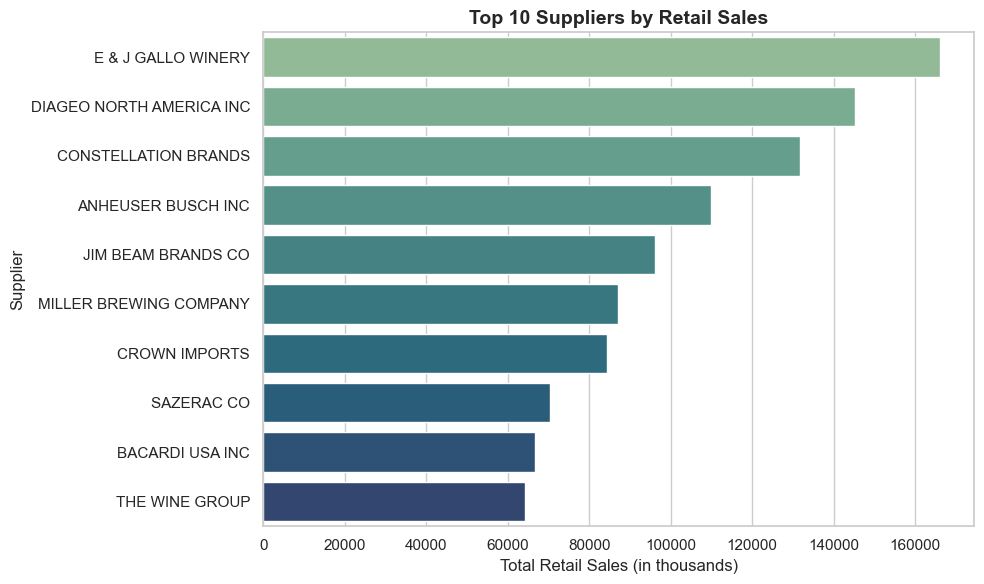

In [9]:
top_suppliers = (
    df.groupby("SUPPLIER")["RETAIL SALES"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_suppliers, x="RETAIL SALES", y="SUPPLIER", palette="crest")

# Title and labels
plt.title("Top 10 Suppliers by Retail Sales", fontsize=14, weight='bold')
plt.xlabel("Total Retail Sales (in thousands)")
plt.ylabel("Supplier")
plt.tight_layout()
plt.show()

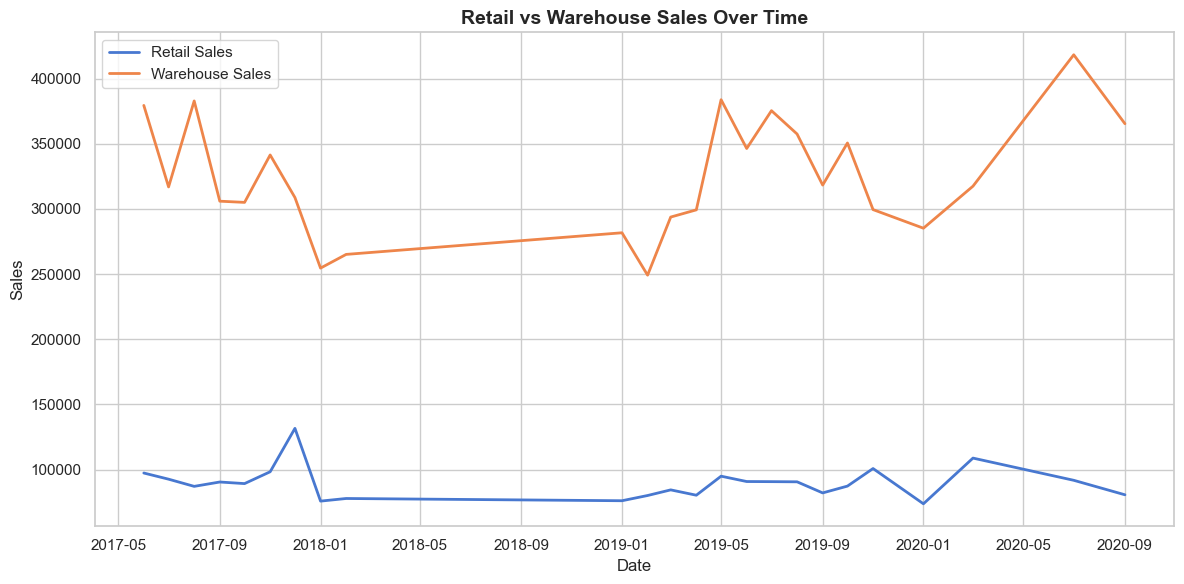

In [10]:

monthly = df.groupby(["YEAR", "MONTH"])[["RETAIL SALES", "WAREHOUSE SALES"]].sum().reset_index()


monthly["date"] = pd.to_datetime(monthly["YEAR"].astype(str) + "-" + monthly["MONTH"].astype(str))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly["date"], monthly["RETAIL SALES"], label="Retail Sales", linewidth=2)
plt.plot(monthly["date"], monthly["WAREHOUSE SALES"], label="Warehouse Sales", linewidth=2)
plt.title("Retail vs Warehouse Sales Over Time", fontsize=14, weight='bold')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# “Month after month, warehouses are being stocked as if demand is booming. But retail sales never catch up. This persistent mismatch suggests poor forecasting or inefficient inventory planning — and it’s bleeding working capital silently.”

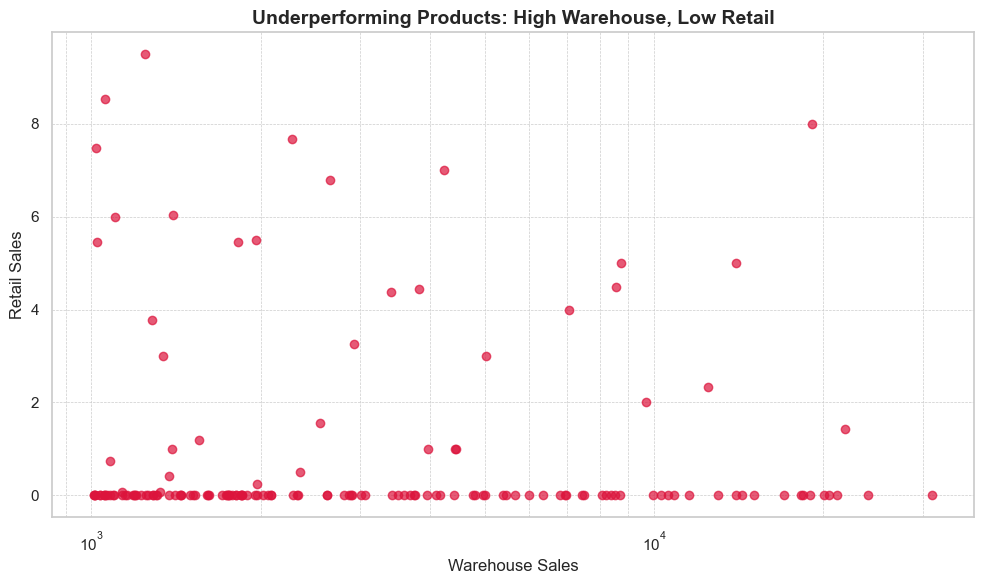

In [11]:
# Aggregate retail and warehouse sales by item
item_perf = (
    df.groupby(["ITEM CODE", "ITEM DESCRIPTION"])[["RETAIL SALES", "WAREHOUSE SALES"]]
    .sum()
    .reset_index()
)

# Filter underperformers: high warehouse, low retail
dead_stock = item_perf[(item_perf["WAREHOUSE SALES"] > 1000) & (item_perf["RETAIL SALES"] < 10)]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(dead_stock["WAREHOUSE SALES"], dead_stock["RETAIL SALES"], alpha=0.7, color='crimson')
plt.title("Underperforming Products: High Warehouse, Low Retail", fontsize=14, weight='bold')
plt.xlabel("Warehouse Sales")
plt.ylabel("Retail Sales")
plt.xscale("log")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [12]:
# Reuse the previously grouped item performance DataFrame
item_perf["SALES_RATIO"] = item_perf["RETAIL SALES"] / item_perf["WAREHOUSE SALES"]
item_perf.replace([float('inf'), -float('inf')], 0, inplace=True)  # handle divide-by-zero
item_perf.fillna(0, inplace=True)

# Filter to items with high warehouse volume
high_stock = item_perf[item_perf["WAREHOUSE SALES"] > 1000]

# Get top 5 worst performers by ratio
worst_offenders = high_stock.sort_values("SALES_RATIO").head(5)

# Display
worst_offenders[["ITEM DESCRIPTION", "RETAIL SALES", "WAREHOUSE SALES", "SALES_RATIO"]]


,ITEM DESCRIPTION,RETAIL SALES,WAREHOUSE SALES,SALES_RATIO
6822,GOOSE ISLAND IPA 1/2K,0.0,1752.00,0.0
7901,STEEL RESERVE BLACKBERRY CANS 12/CS - 24OZ,0.0,3949.27,0.0
34399,KEYSTONE LIGHT 2/15 PK 12.OZ CAN,0.0,1732.87,0.0
34427,BUD ICE 2/12 LNNR - 12OZ,0.0,2814.00,0.0
26145,STELLA ARTOIS 24/19.2OZ AL CAN,0.0,1092.76,0.0


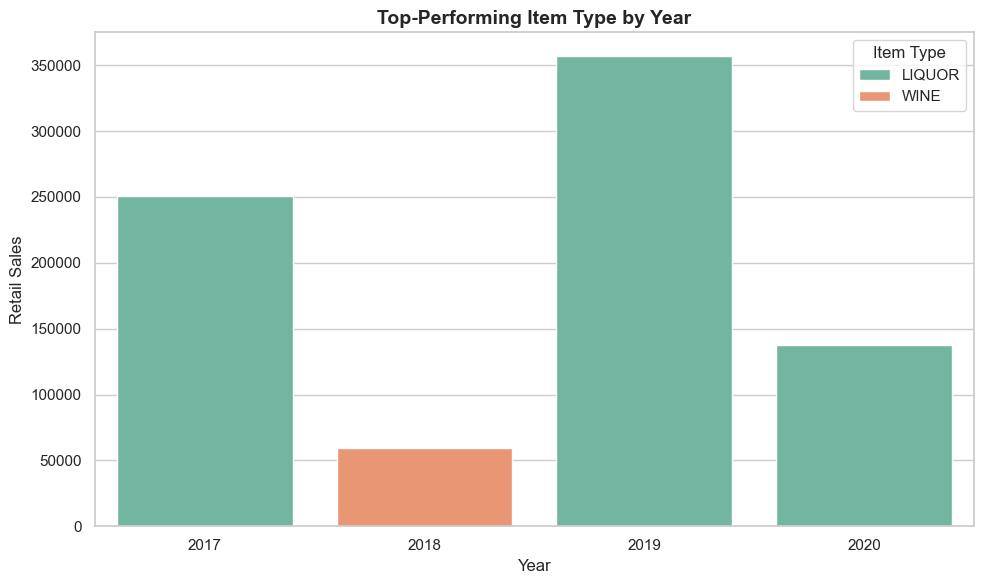

In [13]:
# Group by year and item type
yearly_sales = df.groupby(["YEAR", "ITEM TYPE"])["RETAIL SALES"].sum().reset_index()

# Get top item type per year
top_per_year = (
    yearly_sales
    .sort_values("RETAIL SALES", ascending=False)
    .drop_duplicates("YEAR")
    .sort_values("YEAR")
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_per_year, x="YEAR", y="RETAIL SALES", hue="ITEM TYPE", palette="Set2")

# Titles and labels
plt.title("Top-Performing Item Type by Year", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Retail Sales")
plt.legend(title="Item Type")
plt.tight_layout()
plt.show()


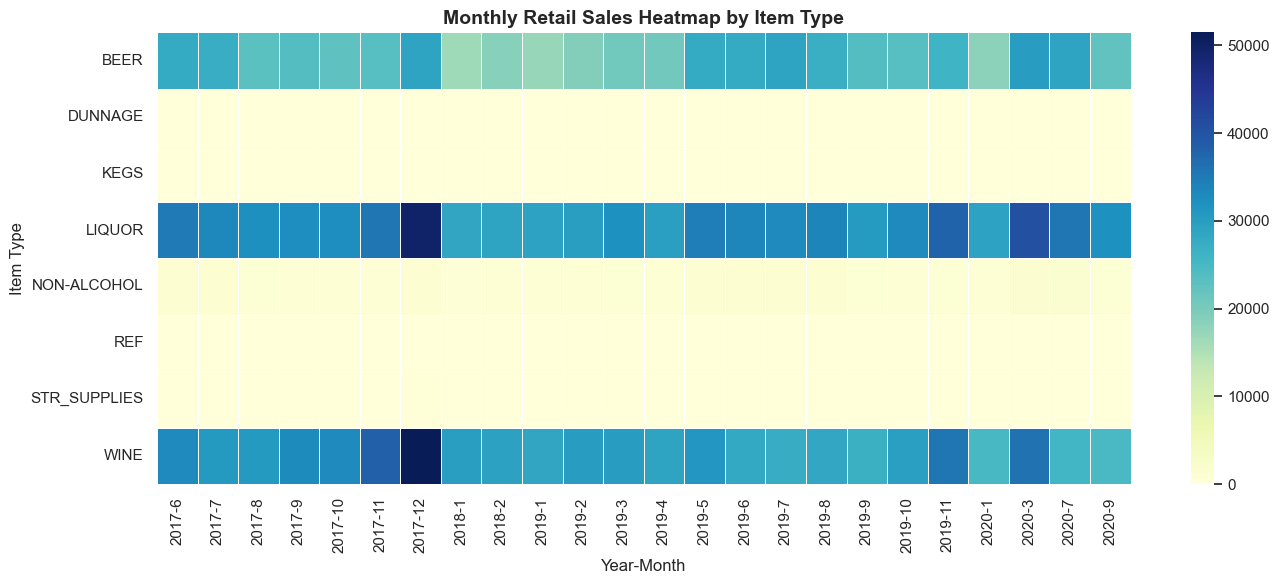

In [14]:
monthly_type_sales = (
    df.groupby(["YEAR", "MONTH", "ITEM TYPE"])["RETAIL SALES"]
    .sum()
    .reset_index()
)

# Pivot for heatmap
pivot = monthly_type_sales.pivot_table(index="ITEM TYPE", columns=["YEAR", "MONTH"], values="RETAIL SALES", aggfunc="sum").fillna(0)

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.5)
plt.title("Monthly Retail Sales Heatmap by Item Type", fontsize=14, weight='bold')
plt.xlabel("Year-Month")
plt.ylabel("Item Type")
plt.tight_layout()
plt.show()

/var/folders/ph/rp_k0z0x7rzbmjtd7j2pdjjc0000gn/T/ipykernel_69414/253548003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="ITEM TYPE", y="RETAIL SALES", showfliers=False, palette="pastel")


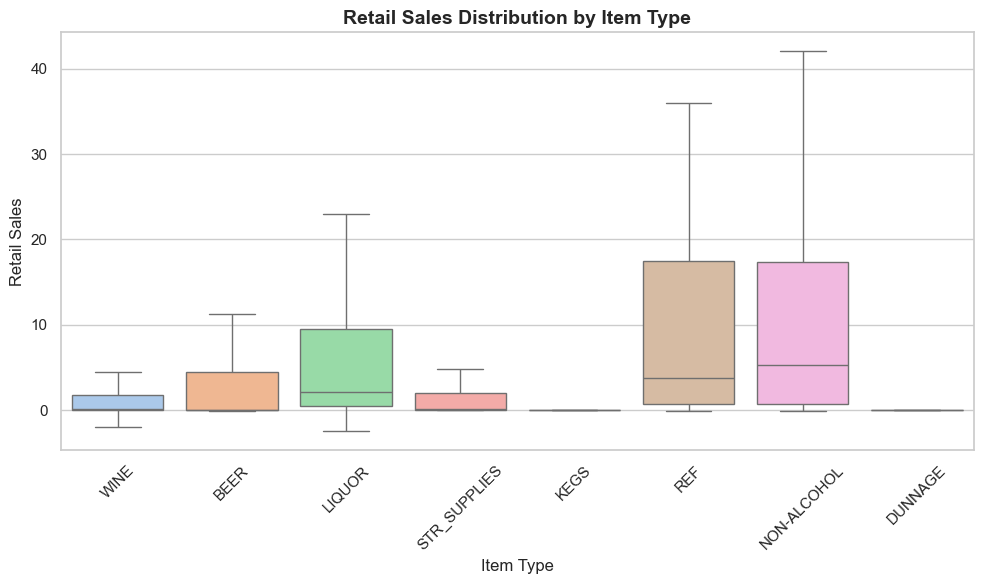

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="ITEM TYPE", y="RETAIL SALES", showfliers=False, palette="pastel")
plt.title("Retail Sales Distribution by Item Type", fontsize=14, weight='bold')
plt.xlabel("Item Type")
plt.ylabel("Retail Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()